In [1]:
# Question 1
#part 1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
ticker_symbol='TCS.NS'
ticket=yf.Ticker(ticker_symbol)
data=ticket.history(period="1y", start="2023-01-01", end="2023-12-31", interval="1d")
data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-02 00:00:00+05:30,3104.235742,3109.804611,3079.675964,3104.664062,709547,0.0,0.0
2023-01-03 00:00:00+05:30,3095.668532,3160.399608,3089.290663,3152.165527,1245178,0.0,0.0
2023-01-04 00:00:00+05:30,3147.738863,3167.396307,3128.224348,3155.306641,1231668,0.0,0.0
2023-01-05 00:00:00+05:30,3170.108676,3176.867454,3124.178178,3151.927002,1826057,0.0,0.0
2023-01-06 00:00:00+05:30,3141.360784,3142.836318,3046.168033,3057.162842,2488376,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00+05:30,3737.360462,3782.552970,3699.986857,3760.964844,2413058,0.0,0.0
2023-12-26 00:00:00+05:30,3756.883617,3770.800272,3727.673000,3732.984131,1285231,0.0,0.0
2023-12-27 00:00:00+05:30,3736.377373,3755.260833,3705.888377,3748.376221,1293976,0.0,0.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Simple Moving Average (SMA)
def mean(data, i, period): # i=rows period = no of day SMA
  if i < period - 1:
    return None
  else:
    return data['Close'].iloc[i - period + 1:i + 1].mean()

data['SMA_30']=None
for i in range(0,len(data)):
  data['SMA_30'].iloc[i]=mean(data, i, 30)


print(data['SMA_30'].tail(5))




Date
2023-12-22 00:00:00+05:30    3518.331714
2023-12-26 00:00:00+05:30     3533.02216
2023-12-27 00:00:00+05:30     3548.68466
2023-12-28 00:00:00+05:30    3564.038981
2023-12-29 00:00:00+05:30    3576.795166
Name: SMA_30, dtype: object


In [5]:
# EXPONENTIAL MOVING AVERAGE
def ema(day):
  s = 2/(1+day)
  for i in range (0,len(data)):
    if i==0:
      data['EMA'].iloc[i]=data['Close'].iloc[i]
    else:
      data['EMA'].iloc[i]=s*(data['Close'].iloc[i])+(1-s)*data['EMA'].iloc[i-1]
  #return data
data['EMA']=None
ema(12)
print(data['EMA'].tail(5))




Date
2023-12-22 00:00:00+05:30    3671.886408
2023-12-26 00:00:00+05:30    3681.286058
2023-12-27 00:00:00+05:30    3691.607621
2023-12-28 00:00:00+05:30    3698.631404
2023-12-29 00:00:00+05:30    3703.591056
Name: EMA, dtype: object


                                 Close  Middle_Band   Upper_Band   Lower_Band
Date                                                                         
2023-12-22 00:00:00+05:30  3760.964844  3518.331714  3816.729038   3219.93439
2023-12-26 00:00:00+05:30  3732.984131   3533.02216  3828.749156  3237.295164
2023-12-27 00:00:00+05:30  3748.376221   3548.68466  3838.341259  3259.028061
2023-12-28 00:00:00+05:30  3737.262207  3564.038981  3842.645947  3285.432016
2023-12-29 00:00:00+05:30  3730.869141  3576.795166  3849.486856  3304.103476


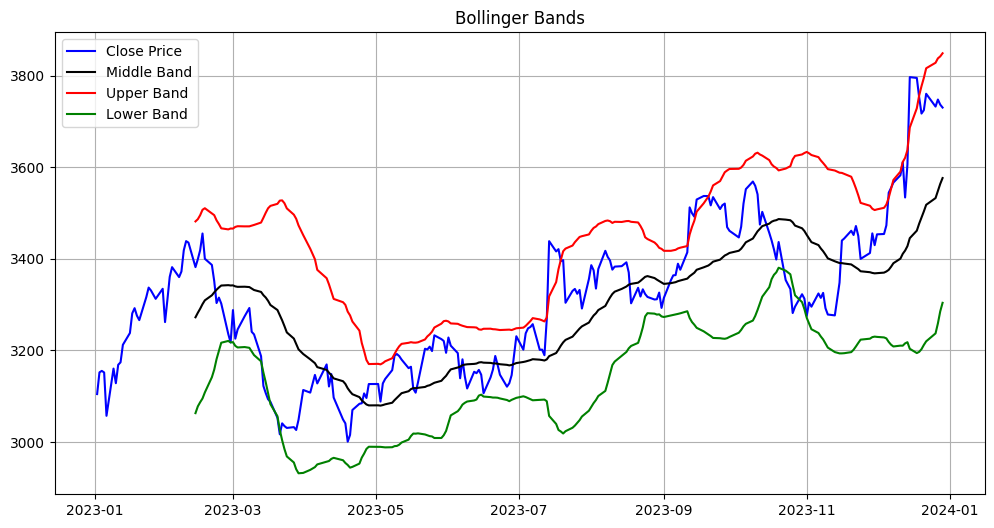

In [6]:
#Part 1
#Bollinger band
def mean(data, i, period):
  if i < period - 1:
    return None
  else:
    return data['Close'].iloc[i - period + 1:i + 1].mean()

data['SMA_30']=None
for i in range(0,len(data)):
  data['SMA_30'].iloc[i]=mean(data, i, 30)
def moving_std(data, i, period):
  if i < period - 1:
    return None
  else:
    return data['Close'].iloc[i - period + 1:i + 1].std()

data['MSD_30']=None
for i in range(0,len(data)):
  data['MSD_30'].iloc[i]=moving_std(data, i, 30)

def bollinger_band(data,period):
  data['Middle_Band']=data['SMA_30']
  data['Upper_Band']=data['SMA_30']+(2*data['MSD_30'])
  data['Lower_Band']=data['SMA_30']-(2*data['MSD_30'])
  return data


bollinger_band(data,30)
print(data[['Close','Middle_Band','Upper_Band','Lower_Band']].tail(5))
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Middle_Band'], label='Middle Band', color='black')
plt.plot(data['Upper_Band'], label='Upper Band', color='red')
plt.plot(data['Lower_Band'], label='Lower Band', color='green')
plt.title('Bollinger Bands')
plt.grid()
plt.legend()
plt.show()

                                 Close       MACD     Signal
Date                                                        
2023-12-22 00:00:00+05:30  3760.964844  90.026283  73.812978
2023-12-26 00:00:00+05:30  3732.984131  88.231562  76.696695
2023-12-27 00:00:00+05:30  3748.376221  87.047813  78.766918
2023-12-28 00:00:00+05:30  3737.262207  84.241788  79.861892
2023-12-29 00:00:00+05:30  3730.869141  80.573327  80.004179


<Figure size 1200x800 with 0 Axes>

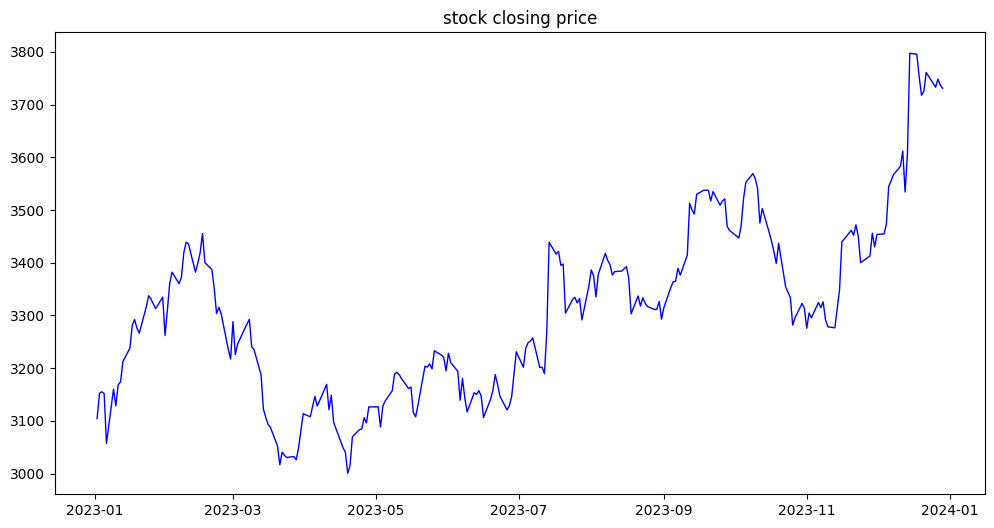

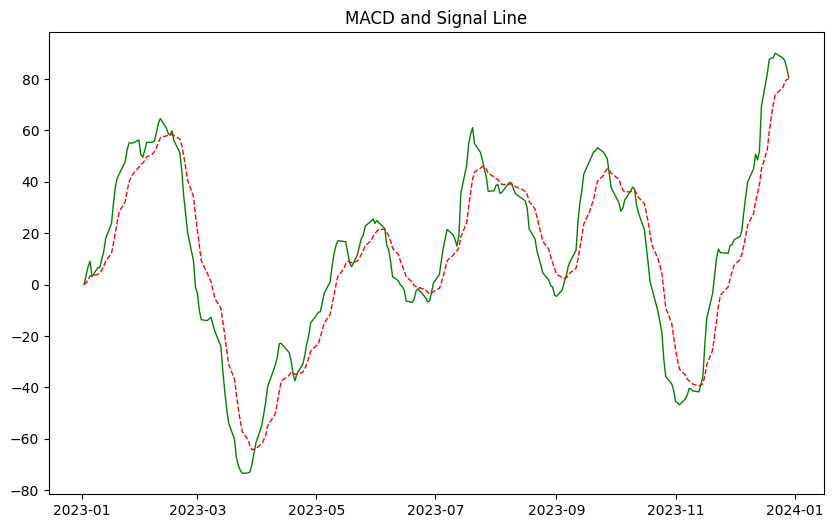

In [7]:
#MACD
def ema(day):
  s = 2/(1+day)
  data['EMA']=None
  for i in range (0,len(data)):
    if i==0:
      data['EMA'].iloc[i]=data['Close'].iloc[i]
    else:
      data['EMA'].iloc[i]=s*(data['Close'].iloc[i])+(1-s)*data['EMA'].iloc[i-1]
  return data['EMA']
def MACD(data,period1,period2,period3):
  data['EMA_12']=ema(period1)
  data['EMA_26']=ema(period2)
  data['MACD']=None
  for i in range(len(data)):
        if data['EMA_12'][i] is not None and data['EMA_26'][i] is not None:
           data['MACD'].iloc[i] = data['EMA_12'].iloc[i] - data['EMA_26'].iloc[i]
        else:
            data['MACD'].iloc[i] = None
  data['Signal']=None
  x=2/(1+period3)
  for i in range (0,len(data)):
    if i==0:
      data['Signal'].iloc[i]=data['MACD'].iloc[i]
    else:
      data['Signal'].iloc[i]=x*data['MACD'].iloc[i]+(1-x)*data['Signal'].iloc[i-1]
MACD(data,12,26,9)
print(data[['Close','MACD','Signal']].tail(5))
plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue', linewidth=1)
plt.title('stock closing price')
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD', color='green', linewidth=1)
plt.plot(data['Signal'], label='Signal', color='red', linestyle='--', linewidth=1)
plt.title('MACD and Signal Line')
plt.show()

In [8]:
#Stochastic Oscillator(SO)
def SO(data,period):
  data['Lowest_low']=data['Low'].rolling(window=period).min()
  data['Maximum_high']=data['High'].rolling(window=period).max()
  data['stochastic oscillator']=(data['Close']-data['Lowest_low'])/(data['Maximum_high']-data['Lowest_low'])*100
  return data

SO(data,14)
print(data[['Close','stochastic oscillator']])

                                 Close  stochastic oscillator
Date                                                         
2023-01-02 00:00:00+05:30  3104.664062                    NaN
2023-01-03 00:00:00+05:30  3152.165527                    NaN
2023-01-04 00:00:00+05:30  3155.306641                    NaN
2023-01-05 00:00:00+05:30  3151.927002                    NaN
2023-01-06 00:00:00+05:30  3057.162842                    NaN
...                                ...                    ...
2023-12-22 00:00:00+05:30  3760.964844              75.363640
2023-12-26 00:00:00+05:30  3732.984131              66.955600
2023-12-27 00:00:00+05:30  3748.376221              67.814255
2023-12-28 00:00:00+05:30  3737.262207              64.726743
2023-12-29 00:00:00+05:30  3730.869141              62.950727

[245 rows x 2 columns]


In [9]:
#Relative Strength Index
def rsi(data,length):
  data['delta']=data['Close'].diff()
  data['gain']=data['delta'].where(data['delta']>0,0)
  data['loss']=data['delta'].where(data['delta']<0,0)
  data['avg_gain']=data['gain'].rolling(window=length).mean()
  data['avg_loss']=data['loss'].rolling(window=length).mean()
  data['rs']=data['avg_gain']/data['avg_loss']
  data['rsi']=100-(100/(1+data['rs']))
  return data
rsi(data,14)
print(data[['Close','rsi']])

                                 Close         rsi
Date                                              
2023-01-02 00:00:00+05:30  3104.664062         NaN
2023-01-03 00:00:00+05:30  3152.165527         NaN
2023-01-04 00:00:00+05:30  3155.306641         NaN
2023-01-05 00:00:00+05:30  3151.927002         NaN
2023-01-06 00:00:00+05:30  3057.162842         NaN
...                                ...         ...
2023-12-22 00:00:00+05:30  3760.964844  151.195788
2023-12-26 00:00:00+05:30  3732.984131  171.206638
2023-12-27 00:00:00+05:30  3748.376221  190.753195
2023-12-28 00:00:00+05:30  3737.262207  207.702856
2023-12-29 00:00:00+05:30  3730.869141  223.425762

[245 rows x 2 columns]


In [10]:
#Average True Range
def atr(data,period):
  data['H-L']=data['High']-data['Low']
  data['H-Cp']=data['High']-data['Close'].shift(1)
  data['L-Cp']=data['Low']-data['Close'].shift(1)
  data['TR']=data[['H-L','H-Cp','L-Cp']].max(axis=1)
  data['ATR']=data['TR'].rolling(window=period).mean()
  return data
atr(data,14)
print(data[['Close','ATR']])

                                 Close        ATR
Date                                             
2023-01-02 00:00:00+05:30  3104.664062        NaN
2023-01-03 00:00:00+05:30  3152.165527        NaN
2023-01-04 00:00:00+05:30  3155.306641        NaN
2023-01-05 00:00:00+05:30  3151.927002        NaN
2023-01-06 00:00:00+05:30  3057.162842        NaN
...                                ...        ...
2023-12-22 00:00:00+05:30  3760.964844  81.090897
2023-12-26 00:00:00+05:30  3732.984131  81.698579
2023-12-27 00:00:00+05:30  3748.376221  79.064145
2023-12-28 00:00:00+05:30  3737.262207  79.559401
2023-12-29 00:00:00+05:30  3730.869141  80.560497

[245 rows x 2 columns]


In [11]:
#Average Directional Index
def dir_m(data):
    data['+DM'] = data['High']-data['High'].shift(1)
    data['+DM'] = data['+DM'].apply(lambda x: x if x > 0 else 0)
    data['-DM'] = data['Low'].shift(1) - data['Low']
    data['+DM'] = data['+DM'].apply(lambda x: x if x > 0 else 0)
def emp(data, period):
    s = 2 / (1 + period)
    data['EMP'] = 0
    for i in range(1, len(data)):
        data['EMP'].iloc[i] = s * (data['+DM'].iloc[i]) + (1 - s) * data['EMP'].iloc[i - 1]

def emn(data, period):
    s = 2 / (1 + period)
    data['EMN'] = 0
    for i in range(1, len(data)):
        data['EMN'].iloc[i] = s * (data['-DM'].iloc[i]) + (1 - s) * data['EMN'].iloc[i - 1]

def dir_m_index(data):
    data['+DI'] = 100 * data['EMP'] / data['ATR']
    data['-DI'] = 100 * data['EMN'] / data['ATR']
    data['+DI'] = data['+DI'].fillna(0)
    data['-DI'] = data['-DI'].fillna(0)
    data['DX'] = (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])) * 100
    data['ADX'] = data['DX'].rolling(window=14).mean()
    data['ADX'] = data['ADX'].fillna(0)

dir_m(data)
emp(data, 14)
emn(data, 14)
dir_m_index(data)

print(data[['Close', '+DM', '-DM', '+DI', '-DI','ADX']])

                                 Close        +DM        -DM        +DI  \
Date                                                                      
2023-01-02 00:00:00+05:30  3104.664062   0.000000        NaN   0.000000   
2023-01-03 00:00:00+05:30  3152.165527  50.594997  -9.614699   0.000000   
2023-01-04 00:00:00+05:30  3155.306641   6.996699 -38.933684   0.000000   
2023-01-05 00:00:00+05:30  3151.927002   9.471147   4.046170   0.000000   
2023-01-06 00:00:00+05:30  3057.162842   0.000000  78.010145   0.000000   
...                                ...        ...        ...        ...   
2023-12-22 00:00:00+05:30  3760.964844  38.603107 -18.342581  42.127796   
2023-12-26 00:00:00+05:30  3732.984131   0.000000 -27.686143  36.239186   
2023-12-27 00:00:00+05:30  3748.376221   0.000000  21.784624  32.453792   
2023-12-28 00:00:00+05:30  3737.262207  19.473428 -23.702598  31.215077   
2023-12-29 00:00:00+05:30  3730.869141   0.000000  26.260279  26.716889   

                        